# Notebook E-tivity 1 CS5062, CE6002 and CE6012

## Please add your name and ID number to this notebook:

NAME: Tom Keane

ID: 20214537

### Students of module CE6012: please ignore tasks 1 and 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import math
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import random

<hr style="border:2px solid gray"> </hr>

## Code for CE6002/CE6012

You can use make_blobs and make_moons to create 'clean' linearly separable and linearly non-separable datasets respectively. But ***plot your data to check if the created data is indeed what you expect it to be.*** Results aren't always as you might expect.

In [2]:
X, y = make_blobs(n_samples=1000, centers=([(3,2),(-2,-2)]), n_features=2)
y = [yy if yy == 1 else -1 for yy in y] 

In [3]:
X, y = make_moons(n_samples=2000, noise=0.05)
X = preprocessing.scale(X)
y = [yy if yy == 1 else -1 for yy in y] 

### Understand below code before you start using it!

In [4]:
def h(x,w):
    #Perceptron model: the sign of the dot product of weights and input vector determines the class allocation
    bias = np.array([1])
    return np.sign(w.T.dot(np.concatenate((bias,x))))

In [5]:
def decision_boundary(weights, x_min, x_max):
    # Return two points on the decision boundary
    return [pointOnBoundary(x_min), pointOnBoundary(x_max)]

In [6]:
def point_on_boundary(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

In [7]:
def pla(training_in, training_out, weights):
    bias = np.array([1])
    iterations=0
    while True:
        errors = 0;
        for x,y in zip(training_in, training_out):
            if (h(x,weights)!=y):
                iterations+=1;
                weights = weights + y*(np.concatenate((bias,x)))
                errors+=1;
        if (errors == 0):
            break
    return weights, iterations

In [8]:
def calc_error(training_in, training_out, weights):
    errors=0
    for x,y in zip(training_in, training_out):
        if (h(x,weights)!=y):
            errors+=1;
    return errors/len(training_in)

<hr style="border:2px solid gray"> </hr>

Add all your own code below this cell. Please make sure to follow the instructions in the E-tivity description. Per task, one cell is provided for code, but you can add as many as you need.

## Task 1 (CS5062)

## identify a target feature

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('./bank_et1.csv', index_col=0)
# removed the unnamed column as it was annoying me for the larger plots

In [11]:
df.head(5)

age          job   marital  education default  balance  ratio_bal_ln  \
0   32   technician    single   tertiary      no      392      1.300134   
1   39   technician  divorced  secondary      no      688     -0.193701   
2   59      retired   married  secondary      no     1035      1.334266   
3   47  blue-collar   married  secondary      no      398      0.362286   
4   54      retired   married  secondary      no     1004      0.072075   

   ratio_ln_inc housing loan   contact  day month  duration  campaign  pdays  \
0      0.473895     yes   no  cellular    1   apr       957         2    131   
1      0.237021     yes  yes  cellular    1   apr       233         2    133   
2      0.121981     yes  yes  cellular    1   apr       126         2    239   
3      1.251328     yes  yes  cellular    1   apr       274         1    238   
4     -0.533738     yes   no  cellular    1   apr       479         1    307   

   previous poutcome subscribed  
0         2  failure         no  
1         1  failure         no  
2         1  failure         no  
3         2  failure         no  
4         1  failure         no

In [12]:
df.tail(5)

age           job  marital  education default  balance  ratio_bal_ln  \
1995   20       student   single        NaN      no     2785     -2.170524   
1996   28        admin.   single  secondary      no      127      0.811788   
1997   81       retired  married    primary      no     1154      0.504655   
1998   46      services  married    primary      no     4343     -0.965874   
1999   40  entrepreneur  married  secondary      no     6403     -0.800893   

      ratio_ln_inc housing loan    contact  day month  duration  campaign  \
1995      1.081071      no   no   cellular   16   sep       327         2   
1996      1.134496      no   no   cellular   16   sep      1334         2   
1997      0.042190      no   no  telephone   17   sep       231         1   
1998      0.302708     yes   no        NaN   20   sep       185         1   
1999      1.066659      no   no   cellular   22   sep       208         2   

      pdays  previous poutcome subscribed  
1995     -1         0      NaN        yes  
1996     -1         0      NaN        yes  
1997     -1         0      NaN        yes  
1998     -1         0      NaN        yes  
1999     -1         0      NaN        yes

In [13]:
for feature in df:
    if df[feature].dtype == object and not feature =='month':
        print()
        print("_______ "+feature+" _______ ")
        print(df[feature].value_counts())


_______ job _______ 
management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

_______ marital _______ 
married     1111
single       674
divorced     215
Name: marital, dtype: int64

_______ education _______ 
secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

_______ default _______ 
no     1985
yes      15
Name: default, dtype: int64

_______ housing _______ 
no     1037
yes     963
Name: housing, dtype: int64

_______ loan _______ 
no     1750
yes     250
Name: loan, dtype: int64

_______ contact _______ 
cellular     1663
telephone     146
Name: contact, dtype: int64

_______ poutcome _______ 
failure    955
success    444
other      147
Name: poutcome, dtype: int64

_______ subscribed _______ 
no     1000
yes    1000
Name: subscribed, dtype: int64


There's a few different fetaures which could be suitable as a dependant variable for two-class classification.

default, housing, loan, contact & subscribed immediately jump out as candidates.

I'll choose subscribed as my dependant (target) feature.

ie. I will be exploring methods to predict whether a member of the study will be in the 'subscribed' category.

## Task 2 (CS5062)

### starting off, I'm going to look at the NUMERICAL attributes

In [14]:
df.describe()

age       balance  ratio_bal_ln  ratio_ln_inc          day  \
count  2000.000000   2000.000000   2000.000000   2000.000000  2000.000000   
mean     41.751500   1413.663500      0.241951      0.485030    13.851500   
std      12.723077   3131.224213      0.821604      1.075543     9.712189   
min      18.000000   -980.000000     -2.632068     -2.851405     1.000000   
25%      32.000000    201.500000     -0.308018     -0.274181     5.000000   
50%      38.000000    551.000000      0.224099      0.487082    12.000000   
75%      50.000000   1644.500000      0.806315      1.211896    23.000000   
max      93.000000  81204.000000      2.961979      4.046914    31.000000   

          duration     campaign        pdays     previous  
count  2000.000000  2000.000000  2000.000000  2000.000000  
mean    292.020500     1.909500   167.896000     2.561500  
std     221.557295     1.378862   131.754126     3.400735  
min       7.000000     1.000000    -1.000000     0.000000  
25%     146.000000     1.000000    75.750000     1.000000  
50%     236.000000     1.000000   182.000000     2.000000  
75%     379.000000     2.000000   251.000000     3.000000  
max    1823.000000    11.000000   854.000000    55.000000

- There are no missing inputs in any numerical category

- vast majority of people have a low number of 'previous' interactions, will investigate further

- the mean age is about 42, and the median is slightly less. I wonder how the age demographics effect the likelihood of subscriptions

- This population appears to have a (somewhat) high degree of wealth inequality in terms of their bank balance. the 75th percentile is just barely above the mean.

From this, we can gather that in the 'previous' category, for the vast majority of people, have a very small number of previous interactions, and there is a small number of people who have vastly higher values.

I'm going to take a quick look at the counts for this category, to serve as a visualisation of this observation

(-0.001, 1.0]    892
(1.0, 3.0]       647
(3.0, 55.0]      461
Name: previous, dtype: int64


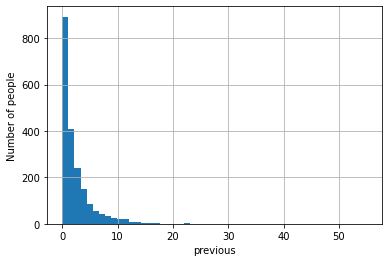

In [15]:
print( pd.qcut(df['previous'], q=3).value_counts())
df['previous'].hist(bins=50)
plt.xlabel('previous')
plt.ylabel('Number of people')
plt.show()

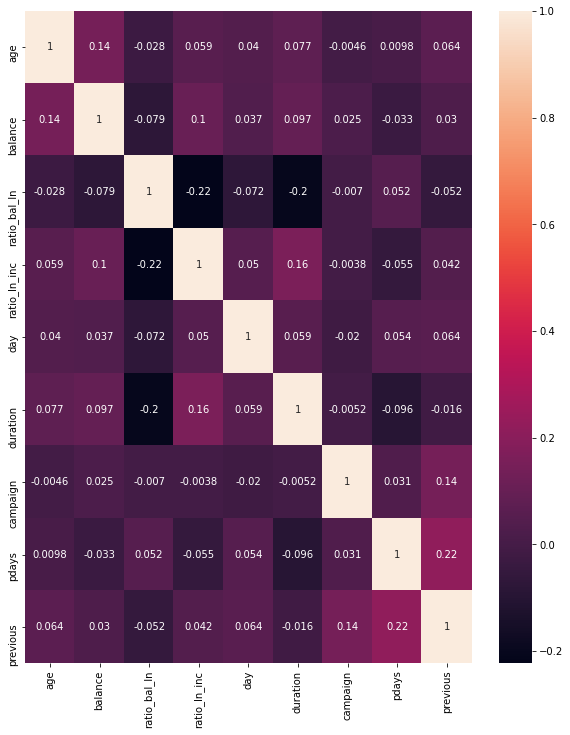

In [16]:
plt.figure(figsize=(10, 12))
sns.heatmap(df.corr(), annot=True);

Strongest correlations appear to be between pdays & previous... ratio_bal_ln & ration_ln_inc... and ratio_bal_inc & duration.

pdays & previous looks to be around 0.2,
ratio_bal_inc & ration_ln_inc... and ratio_bal_ln & duration are both around -0.2

In [17]:
df.corr()

age   balance  ratio_bal_ln  ratio_ln_inc       day  \
age           1.000000  0.140582     -0.028188      0.058725  0.040391   
balance       0.140582  1.000000     -0.079066      0.103384  0.037078   
ratio_bal_ln -0.028188 -0.079066      1.000000     -0.222818 -0.071667   
ratio_ln_inc  0.058725  0.103384     -0.222818      1.000000  0.050414   
day           0.040391  0.037078     -0.071667      0.050414  1.000000   
duration      0.076889  0.096633     -0.204453      0.159398  0.058597   
campaign     -0.004619  0.025103     -0.007049     -0.003781 -0.019719   
pdays         0.009813 -0.033014      0.051644     -0.054520  0.054188   
previous      0.064145  0.030292     -0.052217      0.041773  0.063716   

              duration  campaign     pdays  previous  
age           0.076889 -0.004619  0.009813  0.064145  
balance       0.096633  0.025103 -0.033014  0.030292  
ratio_bal_ln -0.204453 -0.007049  0.051644 -0.052217  
ratio_ln_inc  0.159398 -0.003781 -0.054520  0.041773  
day           0.058597 -0.019719  0.054188  0.063716  
duration      1.000000 -0.005188 -0.095650 -0.015965  
campaign     -0.005188  1.000000  0.030929  0.140995  
pdays        -0.095650  0.030929  1.000000  0.218636  
previous     -0.015965  0.140995  0.218636  1.000000

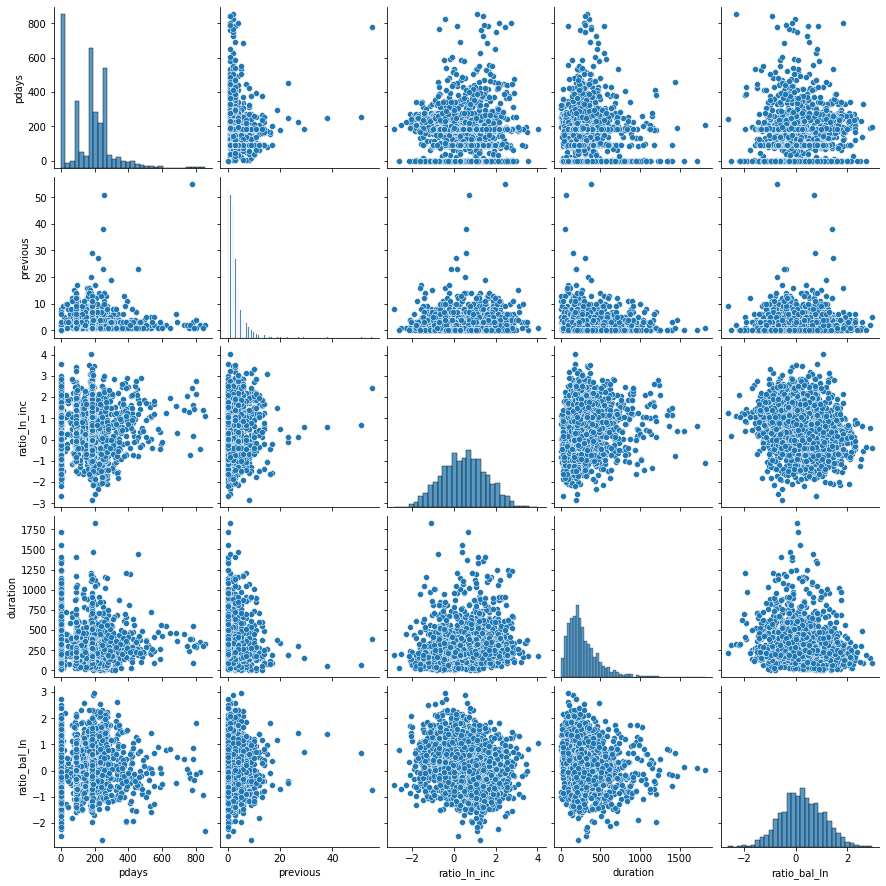

In [18]:
sns.pairplot(data=df[['pdays', 'previous', 'ratio_ln_inc', 'duration', 'ratio_bal_ln']].dropna())
plt.show()

### Next, We'll concentrate on the Categorical data

In [19]:
df.groupby(['loan', 'subscribed']).describe()

age                                                      \
                 count       mean        std   min   25%   50%   75%   max   
loan subscribed                                                              
no   no          793.0  40.431274   9.022734  22.0  33.0  38.0  47.0  64.0   
     yes         957.0  42.914316  15.528991  18.0  31.0  38.0  54.0  93.0   
yes  no          207.0  41.565217   9.782804  26.0  33.0  40.0  50.0  60.0   
     yes          43.0  41.116279  12.111013  22.0  33.0  39.0  51.5  72.0   

                balance               ...  pdays        previous            \
                  count         mean  ...    75%    max    count      mean   
loan subscribed                       ...                                    
no   no           793.0   980.525851  ...  260.0  536.0    793.0  2.282472   
     yes          957.0  1923.662487  ...  185.0  854.0    957.0  2.771160   
yes  no           207.0   798.574879  ...  252.0  360.0    207.0  2.666667   
     yes           43.0  1012.093023  ...  203.0  749.0     43.0  2.534884   

                                                     
                      std  min  25%  50%  75%   max  
loan subscribed                                      
no   no          3.230365  0.0  1.0  2.0  3.0  51.0  
     yes         3.510129  0.0  0.0  2.0  4.0  55.0  
yes  no          3.489234  0.0  1.0  2.0  3.0  29.0  
     yes         3.311947  0.0  0.0  2.0  3.0  14.0  

[4 rows x 72 columns]

- if you have taken out  a loan, you are much less likely to be a subscriber.

In [20]:
df.groupby(['contact', 'subscribed']).describe()

age                                                \
                      count       mean        std   min   25%   50%   75%   
contact   subscribed                                                        
cellular  no          778.0  40.958869   9.211003  22.0  33.0  39.0  48.0   
          yes         885.0  41.350282  14.271028  18.0  30.0  37.0  52.0   
telephone no           55.0  43.381818  10.412761  26.0  34.0  45.0  52.0   
          yes          91.0  58.351648  18.110386  19.0  42.0  63.0  73.5   

                           balance               ...  pdays        previous  \
                       max   count         mean  ...    75%    max    count   
contact   subscribed                             ...                          
cellular  no          60.0   778.0   992.097686  ...  262.0  536.0    778.0   
          yes         93.0   885.0  1761.548023  ...  185.0  854.0    885.0   
telephone no          64.0    55.0  1558.618182  ...  264.0  355.0     55.0   
          yes         86.0    91.0  3304.714286  ...  184.5  690.0     91.0   

                                                                    
                          mean       std  min  25%  50%  75%   max  
contact   subscribed                                                
cellular  no          2.771208  3.393399  1.0  1.0  2.0  3.0  51.0  
          yes         2.833898  3.532426  0.0  0.0  2.0  4.0  55.0  
telephone no          3.545455  3.447050  1.0  1.0  2.0  4.0  16.0  
          yes         2.615385  3.408386  0.0  0.0  2.0  3.0  20.0  

[4 rows x 72 columns]

I'll treat age as a (discrete) categorical feature here, to investigate its relationship with subscriptions

In [21]:
age_bins = pd.qcut(df['age'], q=10)
df.groupby([age_bins, 'subscribed']).describe()

age                                          \
                           count       mean       std   min    25%   50%   
age            subscribed                                                  
(17.999, 28.0] no           61.0  26.852459  1.364259  22.0  26.00  27.0   
               yes         170.0  25.070588  2.498701  18.0  23.25  25.0   
(28.0, 31.0]   no          105.0  30.323810  0.778253  29.0  30.00  31.0   
               yes         107.0  29.934579  0.827260  29.0  29.00  30.0   
(31.0, 33.0]   no          103.0  32.543689  0.500523  32.0  32.00  33.0   
               yes          69.0  32.565217  0.499360  32.0  32.00  33.0   
(33.0, 36.0]   no          141.0  34.943262  0.781693  34.0  34.00  35.0   
               yes         109.0  34.972477  0.821682  34.0  34.00  35.0   
(36.0, 38.0]   no           81.0  37.456790  0.501233  37.0  37.00  37.0   
               yes          63.0  37.460317  0.502426  37.0  37.00  37.0   
(38.0, 43.0]   no          147.0  40.795918  1.442690  39.0  40.00  41.0   
               yes          81.0  40.888889  1.474788  39.0  39.00  41.0   
(43.0, 47.0]   no          108.0  45.583333  1.051256  44.0  45.00  46.0   
               yes          64.0  45.656250  1.026919  44.0  45.00  46.0   
(47.0, 53.0]   no          126.0  50.333333  1.720465  48.0  49.00  50.0   
               yes          78.0  50.448718  1.911329  48.0  49.00  51.0   
(53.0, 60.0]   no          127.0  56.732283  1.933205  54.0  55.00  57.0   
               yes          94.0  57.212766  2.242658  54.0  55.00  57.0   
(60.0, 93.0]   no            1.0  64.000000       NaN  64.0  64.00  64.0   
               yes         165.0  69.127273  7.194310  61.0  63.00  67.0   

                                       balance               ...   pdays  \
                             75%   max   count         mean  ...     75%   
age            subscribed                                    ...           
(17.999, 28.0] no          28.00  28.0    61.0   547.803279  ...  248.00   
               yes         27.00  28.0   170.0  1190.258824  ...  182.75   
(28.0, 31.0]   no          31.00  31.0   105.0   697.380952  ...  259.00   
               yes         31.00  31.0   107.0  1647.775701  ...  188.00   
(31.0, 33.0]   no          33.00  33.0   103.0  1220.495146  ...  262.00   
               yes         33.00  33.0    69.0  1348.072464  ...  280.00   
(33.0, 36.0]   no          36.00  36.0   141.0  1134.460993  ...  259.00   
               yes         36.00  36.0   109.0  1648.467890  ...  183.00   
(36.0, 38.0]   no          38.00  38.0    81.0  1004.037037  ...  269.00   
               yes         38.00  38.0    63.0  1469.587302  ...  200.50   
(38.0, 43.0]   no          42.00  43.0   147.0   774.850340  ...  260.50   
               yes         42.00  43.0    81.0  2761.456790  ...  281.00   
(43.0, 47.0]   no          46.00  47.0   108.0   653.962963  ...  252.25   
               yes         46.25  47.0    64.0  2093.500000  ...  213.00   
(47.0, 53.0]   no          52.00  53.0   126.0   842.484127  ...  250.75   
               yes         52.00  53.0    78.0  1149.512821  ...  182.00   
(53.0, 60.0]   no          58.00  60.0   127.0  1405.299213  ...  257.50   
               yes         60.00  60.0    94.0  2146.904255  ...  193.75   
(60.0, 93.0]   no          64.00  64.0     1.0    67.000000  ...  111.00   
               yes         74.00  93.0   165.0  2978.133333  ...  183.00   

                                 previous                                     \
                             max    count      mean       std  min  25%  50%   
age            subscribed                                                      
(17.999, 28.0] no          328.0     61.0  1.836066  2.091095  0.0  0.0  1.0   
               yes         521.0    170.0  2.058824  2.932588  0.0  0.0  1.0   
(28.0, 31.0]   no          355.0    105.0  3.104762  6.631689  0.0  1.0  2.0   
               yes         842.0    107.0  2.271028

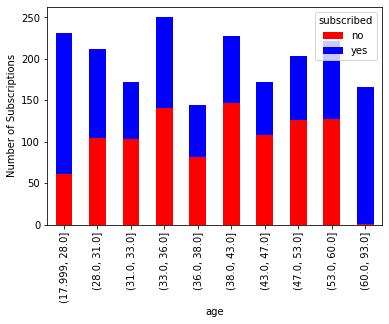

normalised


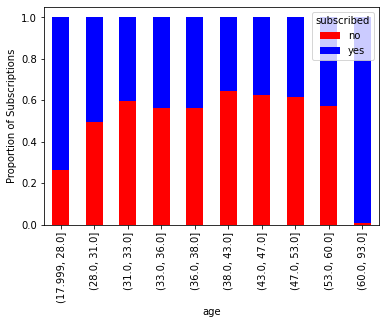

In [22]:
crosstab_CL = pd.crosstab(age_bins, df['subscribed'])
crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Subscriptions')
plt.show()

print("normalised")
crosstab_CL = pd.crosstab(age_bins, df['subscribed'], normalize='index')
crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Proportion of Subscriptions')
plt.show()

- Those in the highest age bracket (60 - 93) are the most likely to have a subscription with 160:1 ratio of Y:N
- Those in the lowest age bracket (18 - 28) are the second most likely, with a  2.79:1 ratio of Y:N

- Those who are 28 - 31 are about evens

- Age brackets from 31 - 60 are much less likely to have a subscription, gradually decreasing in likelihood of subscription until it minimises at the mean age of 38 - 43, which has a 1:2 ratio of Y:N




- The cutoff in subscriptions at ages above 60 doesn't seem natural, and could be indicative of data manipulation either before or after the data was gathered. Perhaps concentrated advertising on other age brackets, or this population group was ommitted from the records for some reason. For this reason, using our data for this particular age bracket (60 - 93) as a predictor for subscriptions could be problematic.

- it is also surprising to see such a large subscription base from the younger age group, which suggests that their is something unusual about this data-set.


lets take a look at how frequently those in different balance brackets subscribe

In [23]:
balance_bins = pd.qcut(df['balance'], q=20)

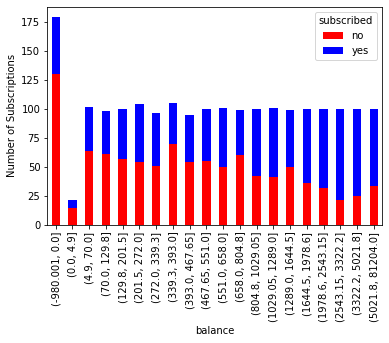

normalised


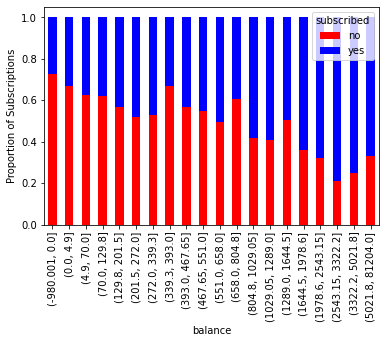

In [24]:
crosstab_CL = pd.crosstab(balance_bins, df['subscribed'])
crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Subscriptions')
plt.show()

print("normalised")
crosstab_CL = pd.crosstab(balance_bins, df['subscribed'], normalize='index')
crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Proportion of Subscriptions')
plt.show()

We see that those with a negative balance and those with a low balance (< €5) are much less likely to have made subscriptions, and the probability steadily increases as an individuals balance increases.

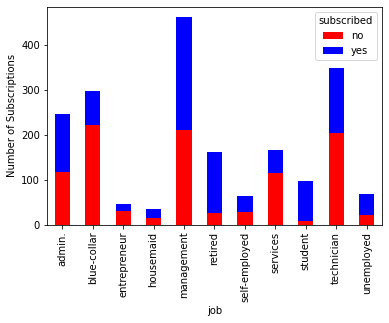

normalised


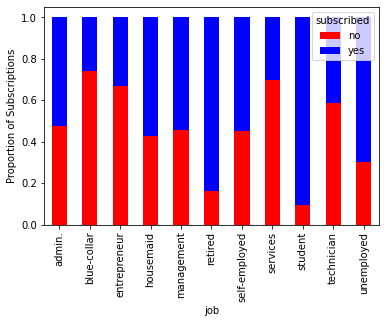

In [25]:
crosstab_CL = pd.crosstab(df['job'], df['subscribed'])
crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Subscriptions')
plt.show()

print("normalised")
crosstab_CL = pd.crosstab(df['job'], df['subscribed'], normalize='index')
crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Proportion of Subscriptions')
plt.show()

We can see that retirees amnd students have the highest subscription numbers, which would make sense, recalling the higher likelihood of the youngest and oldest demographics to subscribe.

We can also see that the least likely professions to have subscriptions are those with:
- blue-collar work
- those in the service industry
- technicians
- entrepeneurs (amount of data-points is very low for this category, so I will exclude it from the analysis)

 Common sense would imply that of those who are working, these might be lower income sectors, and we already know that subscriptions have a positive correlation with an individuals bank balance, which obviously correlates with income.


As a sanity check for this argument, I will investigate the relationship between bank balance and profession, to see if there is a three-way relationship bewteen profession, balance and likelihood of subscription, that is not present among other professions which correlate more preferably with subscriptions, such as management and adminisrative roles.


It makes sense that students have the most subscriptions, given the high proportion of young subscribers, and that students tend to be young. (hopefully I don't need to provide statistical justification that students tend to be young)

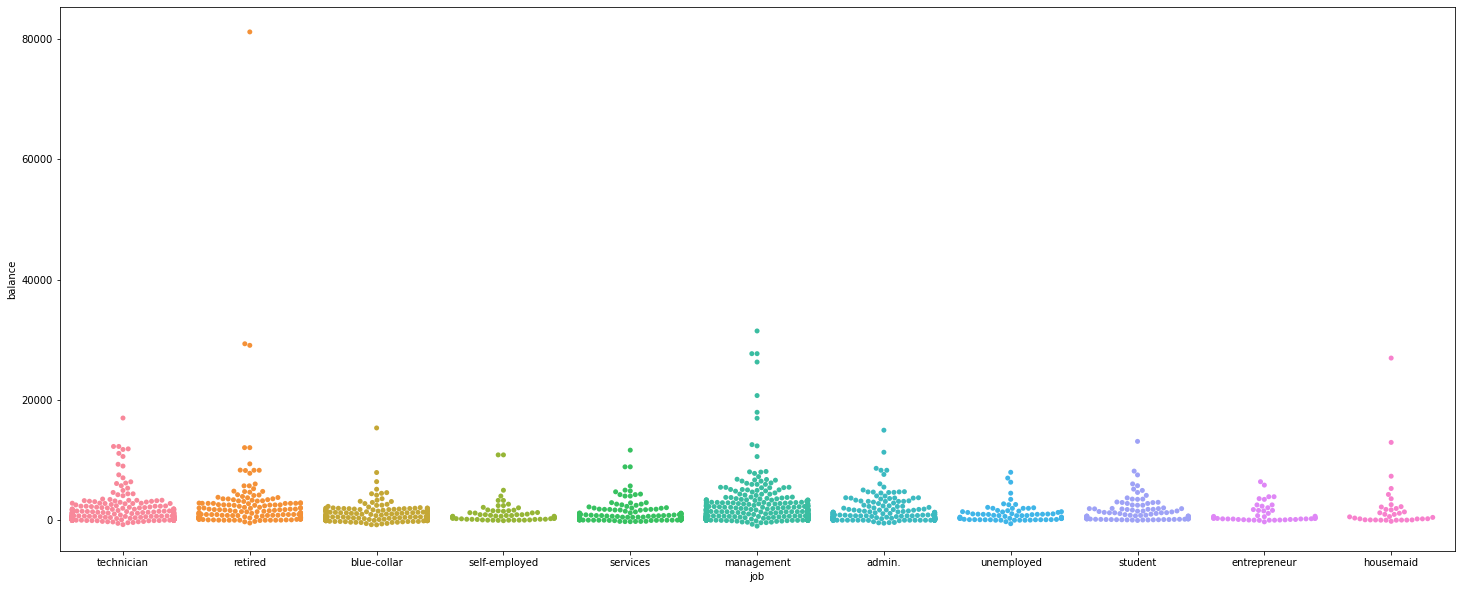

In [26]:
plt.figure(figsize=(25, 10))
sns.swarmplot(data=df, x='job', y='balance')
plt.show()

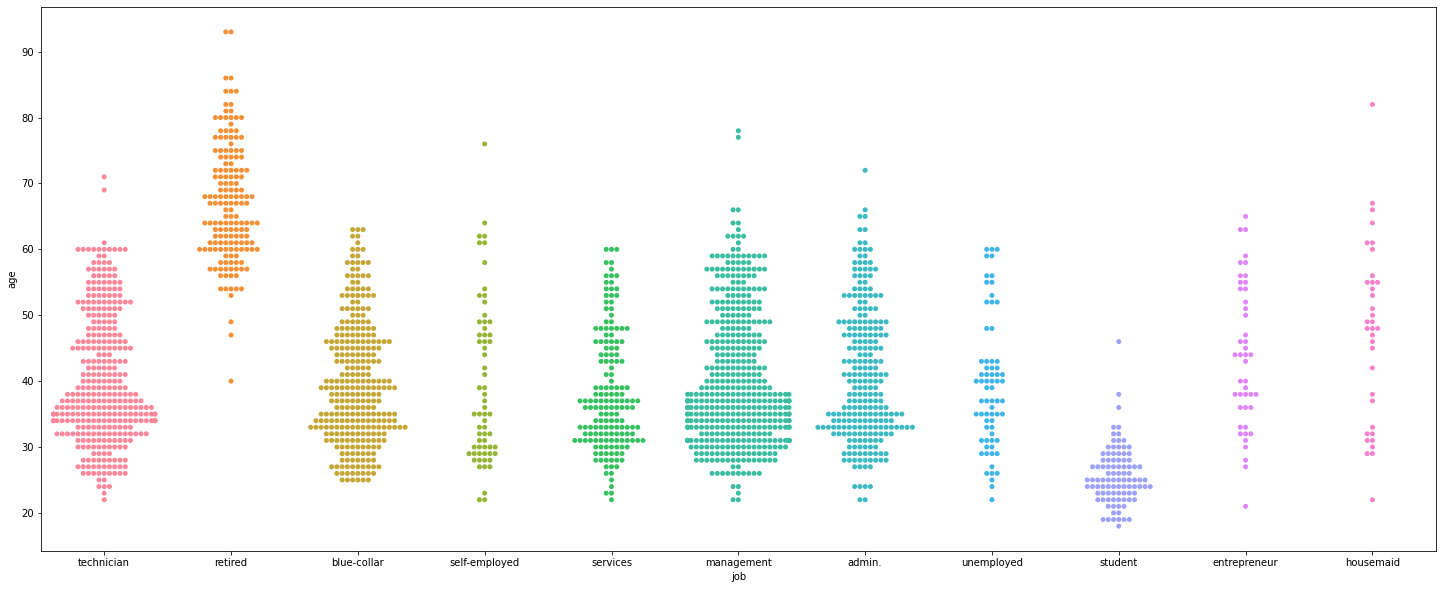

In [27]:
plt.figure(figsize=(25, 10))
sns.swarmplot(data=df, x='job', y='age')
plt.show()

Here we can gather that administrative roles and managerial roles do tend to have higher balances than those in blue-collar work and services industry workers.

Technicians, however seem to have even higher balances than administrative professionals despite the lack of subscribers in this profession.

With the exception of the technicians, this would appear to support the argument that the lower wage/ balance bracket of blue-collar workers and those in services are less likely to be subscribers, possibly as a result of their chosen professions.

My justification for not including the unemployed in this analysis is that there are a wide range of reasons why a person could be unemployed, and there simply isn't enough information regarding the nature of their unemployment to use it in an analysis of how their balance may affect their subscription status.

 For example, according to this swarmplot, much of the unemployed population has a higher balance than those the self-employed, the housemaids and entrepeneurs, which seems counter-intuitive for a random sample of the unemployed population in general.

 The other populations which I haven't included in this analysis is due to their low numbers in our data-set.

As a result of my analysis so far, I would suspect that as a result of their overall bank balance, of those who are currently working, those in the managerial class followed by those in administration, particularly if they are in a slightly younger age range of 20 - 35.

Those who fall outside of these age ranges are less likely to subscribe, particularly if they're in a lower wage bracket profession (such as blue collar work or services), are less likely to subscribe

In [28]:
selected_professions = df[df['job']=='management'].append( df[df['job']=='blue-collar'] )

selected_professions_age_bins = pd.qcut(selected_professions['age'], q=3)

selected_professions.groupby(['job', 'subscribed', selected_professions_age_bins]).describe()

age                                   \
                                      count       mean       std   min   25%   
job         subscribed age                                                     
blue-collar no         (21.999, 34.0]  71.0  31.140845  2.598328  25.0  30.0   
                       (34.0, 43.333]  78.0  38.653846  2.474949  35.0  37.0   
                       (43.333, 78.0]  72.0  49.763889  4.778158  44.0  46.0   
            yes        (21.999, 34.0]  35.0  28.942857  2.899725  25.0  27.0   
                       (34.0, 43.333]  13.0  38.153846  2.853248  35.0  35.0   
                       (43.333, 78.0]  29.0  53.034483  6.400239  45.0  48.0   
management  no         (21.999, 34.0]  70.0  31.371429  2.037129  26.0  30.0   
                       (34.0, 43.333]  71.0  38.436620  2.482697  35.0  36.5   
                       (43.333, 78.0]  69.0  51.623188  4.678177  44.0  48.0   
            yes        (21.999, 34.0]  91.0  30.010989  2.923067  22.0  28.0   
                       (34.0, 43.333]  77.0  37.818182  2.343677  35.0  36.0   
                       (43.333, 78.0]  83.0  53.265060  7.163737  44.0  47.0   

                                                         balance               \
                                        50%    75%   max   count         mean   
job         subscribed age                                                      
blue-collar no         (21.999, 34.0]  32.0  33.00  34.0    71.0   833.591549   
                       (34.0, 43.333]  39.0  40.00  43.0    78.0   556.923077   
                       (43.333, 78.0]  48.0  53.25  60.0    72.0   543.013889   
            yes        (21.999, 34.0]  29.0  31.00  34.0    35.0   772.571429   
                       (34.0, 43.333]  39.0  39.00  43.0    13.0  1101.230769   
                       (43.333, 78.0]  52.0  60.00  63.0    29.0  1263.310345   
management  no         (21.999, 34.0]  31.0  33.00  34.0    70.0  1311.028571   
                       (34.0, 43.333]  38.0  40.00  43.0    71.0  1188.929577   
                       (43.333, 78.0]  52.0  56.00  59.0    69.0  1989.797101   
            yes        (21.999, 34.0]  30.0  33.00  34.0    91.0  1423.428571   
                       (34.0, 43.333]  37.0  39.00  43.0    77.0  2265.402597   
                       (43.333, 78.0]  52.0  58.00  78.0    83.0  2381.963855   

                                       ...   pdays        previous            \
                                       ...     75%    max    count      mean   
job         subscribed age             ...                                     
blue-collar no         (21.999, 34.0]  ...  264.00  360.0     71.0  1.802817   
                       (34.0, 43.333]  ...  265.75  346.0     78.0  1.628205   
                       (43.333, 78.0]  ...  259.00  336.0     72.0  2.611111   
            yes        (21.999, 34.0]  ...  180.50  828.0     35.0  3.057143   
                       (34.0, 43.333]  ...  182.00  648.0     13.0  2.769231   
                       (43.333, 78.0]  ...  182.00  472.0     29.0  2.620690   
management  no         (21.999, 34.0]  ...  256.75  320.0     70.0  3.314286   
                       (34.0, 43.333]  ...  259.50  355.0     71.0  2.295775   
                       (43.333, 78.0]  ...  244.00  274.0     69.0  3.115942   
            yes        (21.999, 34.0]  ...  229.50  728.0     91.0  2.802198   
                       (34.0, 43.333]  ...  183.00  854.0     77.0  2.649351   
                       (43.333, 78.0]  ...  186.00  804.0     83.0  3.843373   

                                                                           
                                            std  min  25%  50%  75%   max  
job         subscribed age                                                 
blue-collar no         (21.999, 34.0]  2.018626  0.0  0.5  1.0  2.0  11.0  
                       (34.0, 43.333]  1.831251  0.0  0.0  1.0  2.0   9.0  
                       (43.333, 78.0]  2.8

In [29]:
selected_professions = df[df['job']=='admin.'].append( df[df['job']=='services'] )

selected_professions_age_bins = pd.qcut(selected_professions['age'], q=3)

selected_professions.groupby(['job', 'subscribed', selected_professions_age_bins]).describe()

age                                    \
                                   count       mean       std   min    25%   
job      subscribed age                                                      
admin.   no         (21.999, 34.0]  38.0  31.000000  2.493234  22.0  29.00   
                    (34.0, 43.0]    41.0  38.560976  2.966890  35.0  36.00   
                    (43.0, 72.0]    38.0  51.184211  4.689582  44.0  48.00   
         yes        (21.999, 34.0]  46.0  30.413043  3.317135  22.0  28.00   
                    (34.0, 43.0]    31.0  38.419355  2.591964  35.0  36.00   
                    (43.0, 72.0]    53.0  52.924528  6.704904  44.0  47.00   
services no         (21.999, 34.0]  49.0  30.734694  2.177303  24.0  29.00   
                    (34.0, 43.0]    33.0  38.090909  2.350048  35.0  36.00   
                    (43.0, 72.0]    33.0  50.151515  4.644360  44.0  46.00   
         yes        (21.999, 34.0]  22.0  29.545455  3.851126  22.0  27.25   
                    (34.0, 43.0]    15.0  37.800000  2.396426  35.0  36.00   
                    (43.0, 72.0]    13.0  51.384615  5.530800  44.0  47.00   

                                                     balance               \
                                     50%   75%   max   count         mean   
job      subscribed age                                                     
admin.   no         (21.999, 34.0]  32.0  33.0  34.0    38.0   872.973684   
                    (34.0, 43.0]    38.0  41.0  43.0    41.0   585.243902   
                    (43.0, 72.0]    51.0  55.5  60.0    38.0   707.789474   
         yes        (21.999, 34.0]  31.0  33.0  34.0    46.0   857.739130   
                    (34.0, 43.0]    38.0  41.0  43.0    31.0  2216.225806   
                    (43.0, 72.0]    53.0  58.0  72.0    53.0  1873.716981   
services no         (21.999, 34.0]  31.0  32.0  34.0    49.0   660.061224   
                    (34.0, 43.0]    37.0  39.0  43.0    33.0  1184.515152   
                    (43.0, 72.0]    48.0  54.0  60.0    33.0   713.393939   
         yes        (21.999, 34.0]  30.5  33.0  34.0    22.0   799.045455   
                    (34.0, 43.0]    37.0  38.5  43.0    15.0  2459.600000   
                    (43.0, 72.0]    52.0  55.0  60.0    13.0  1729.846154   

                                    ...   pdays        previous            \
                                    ...     75%    max    count      mean   
job      subscribed age             ...                                     
admin.   no         (21.999, 34.0]  ...  258.75  349.0     38.0  2.526316   
                    (34.0, 43.0]    ...  273.00  349.0     41.0  2.804878   
                    (43.0, 72.0]    ...  259.75  340.0     38.0  2.105263   
         yes        (21.999, 34.0]  ...  183.00  518.0     46.0  1.739130   
                    (34.0, 43.0]    ...  300.00  529.0     31.0  3.709677   
                    (43.0, 72.0]    ...  182.00  690.0     53.0  2.698113   
services no         (21.999, 34.0]  ...  261.00  355.0     49.0  2.346939   
                    (34.0, 43.0]    ...  262.00  536.0     33.0  1.606061   
                    (43.0, 72.0]    ...  258.00  329.0     33.0  2.000000   
         yes        (21.999, 34.0]  ...  181.75  579.0     22.0  2.227273   
                    (34.0, 43.0]    ...  197.50  421.0     15.0  2.533333   
                    (43.0, 72.0]    ...  417.00  761.0     13.0  2.384615   

                                                                        
                                         std  min  25%  50%  75%   max  
job      subscribed age                                                 
admin.   no         (21.999, 34.0]  2.835459  0.0  1.0  2.0  3.0  14.0  
                    (34.0, 43.0]    3.472892  0.0  1.0  2.0  3.0  17.0  
                    (43.0, 72.0]    1.736562  0.0  1.0  2.0  3.0   7.0  
         yes        (21.999, 34.0]  2.112763  0.0  0.0  1.0  3.0  10.0  
                    (34.0, 43.0]    3.78764

As a simple illustration, I have split the blue-collar, service, administrative and managerial groups into three age groups, which will simply be referred to as young, middle and older (43 isn't that old!).

### young (22 - 34)
- 33% of young blue-collar workers subscribe
- 31% of young service workers subscribe
- 45% of young administrative workers subscribe
- 56% of young managerial workers subscribe


### middle (34 - 43)
- 14% of middling blue-collar workers subscribe
- 31% of middling service workers subscribe
- 43% of middling administrative workers subscribe
- 52% of middling managerial workers subscribe

### older (43 - 78)
- 29% of older blue-collar workers subscribe
- 28% of older servive workers subscribe
- 58% of older administrative workers subscribe
- 47% of older managerial workers subscribe

So we can confirm that accross all professions, younger workers are more likely to subscribe, and generally speaking the managers are the most likely of the studied professions.

As outlined above, there are issues with analysis of the older age categories due to an unusually high rate (>99%) of subscribers at 60yrs and above.

However even in this age bracket the general rule of higher balance professions turning out more subscribers holds true, although the positions of managers and administrators have swapped in this case.

## Task 3 (CE6002/CE6012)

#### Describe (in a markdown cell) how a perceptron can be used to classify two objects given their circumference and weight. You may assume that these two features result in linear separability of the two classes in the given dataset. Use the following terms in your description:

In [30]:
X, y = make_blobs(n_samples=1000, centers=([(3,2),(-2,-2)]), n_features=2)
y = [yy if yy == 1 else -1 for yy in y] 

A perceptron is a single layer neural network (NN) which consists of an input-space, weights & bias, an unknown target function and then the output space.

in the example of a perceptron classifying two objects given their circumference and weight, the data set will be divided into a training, and testing set.

in our example, the input space consists of all the possible weights (don't confuse this with the technical term 'weight', which is an inner component of the perceptron.) and circumferences of the objects which make up our data set. For this example, the input space is 2^2

The data points are fed into the perceptron, and for each feature for the data points, there is a weight associated with it. These weights are applied to each feature, and added together. The Bias is then added to this to give us our weighted sum. 

This weighted sum is then fed into some kind of step function, which squashes the sum into acceptable parameters for interpretation as either class A or B.

The first attempt the perceptron makes at this will probably be bad, which is our first hypothesis. We can find out how good or bad it is by testing this hypothesis on our training set, which will give us an 'in-sample error'. This is tested according to our error measure, which in this case is simply, did the perceptron correctly classify the object as A or B.

The perceptron will then randomly shift the weights by a small amount, and then repeat the process and see if the in-sample error has reduced.

Once this process has completed, the perceptron has given us its final hypothesis, which we can then use to test on our testing data, which the algorithm hasn't seen before. This will give us some amount of 'out-sample error'.

There is basically an infinite number of hypothesies which the perceptron can churn out. We're looking to get as close as we can to the unknown target function, which is theoretically the best possible configuration of weights & bias for the perceptron's performance.

## Task 4 (CE6002/CE6012)

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
# from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import math
from sklearn.datasets.samples_generator import make_blobs
# from sklearn.model_selection import train_test_split
import random as rnd

In [32]:
def h(x,w):
    #Perceptron model: the sign of the dot product of weights and input vector determines the class allocation
    bias = np.array([1])
    return np.sign(w.T.dot(np.concatenate((bias,x))))

def decision_boundary(weights, x_min, x_max):
    # Return two points on the decision boundary
    return [point_on_boundary(weights, x_min), point_on_boundary(weights, x_max)]

def point_on_boundary(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

def pla(training_in, training_out, weights, max_iterations=10000000):
    bias = np.array([1])
    iterations=0
    while iterations <= max_iterations:
        errors = 0;
        for x,y in zip(training_in, training_out):
            if (h(x,weights)!=y):
                iterations+=1;
                weights = weights + y*(np.concatenate((bias,x)))
                errors+=1;
        if (errors == 0):
            break
    return weights, iterations

def calc_error(training_in, training_out, weights):
    errors=0
    for x,y in zip(training_in, training_out):
        if (h(x,weights)!=y):
            errors+=1;
    return errors/len(training_in)

def visualise_boundary(pla_weights, X, y, data_set_name="data set"):
    class_boundary = decision_boundary(pla_weights, np.min(X), np.max(X))
    Xa_min_max = [np.min(X[:,0])-0.5, np.max(X[:,0])+0.5]
    Xb_min_max = [np.min(X[:,1])-0.5, np.max(X[:,1])+0.5]
    axes = plt.gca()
    axes.set_xlim(Xa_min_max)
    axes.set_ylim(Xb_min_max)
    plt.plot([ np.min(X), np.max(X)], class_boundary)
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.title(f"decision boundary following pla of {data_set_name}")
    plt.xlabel('$x_a$')
    plt.ylabel('$x_b$')
    plt.show()

def make_weights():
    return [
        rnd.gauss(-1,1),
        rnd.gauss(-1,1),
        rnd.gauss(-1,1)
    ]

## Blobs

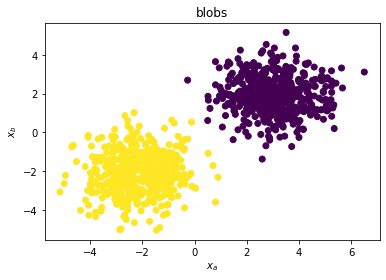

In [33]:
X, y = make_blobs(n_samples=1000, centers=([(3,2),(-2,-2)]), n_features=2)
y = [yy if yy == 1 else -1 for yy in y]

plt.scatter(X[:,0], X[:,1], c=y)
plt.title("blobs")
plt.xlabel('$x_a$')
plt.ylabel('$x_b$')
plt.show()

pla_weights, iterations {pla_weights, iterations}


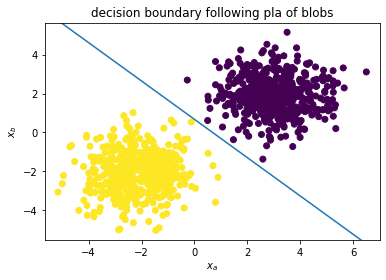

In [34]:
pla_weights, iterations = pla(X, y, np.array([0.5,0.5, 0.5]))
print("pla_weights, iterations {pla_weights, iterations}")
visualise_boundary(pla_weights, X, y, "blobs")

# moons

In [35]:
    def moons_pla_setup(n_samples=2000, noise=0.05, plot=True):
        X, y = make_moons(n_samples=2000, noise=0.05)
        X = preprocessing.scale(X)
        y = [yy if yy == 1 else -1 for yy in y]
        if plot == True:
            plot_data_set(X, y)
        return X, y

    def plot_data_set(X, y):
        plt.scatter(X[:,0], X[:,1], c=y)
        plt.title("moons")
        plt.xlabel('$x_a$')
        plt.ylabel('$x_b$')
        plt.show()

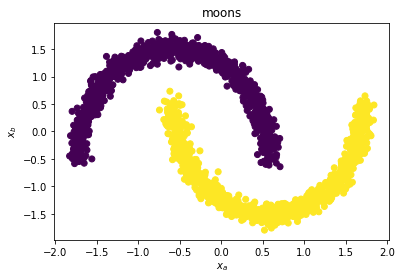

In [36]:
X, y = moons_pla_setup()

error from pla cannot reach 0 for this data set, so a max_iteration property was introduced to the pla algorithm.

pla_weights, pla_iterations (array([ 1.18789979,  0.85156002, -1.61232069]), 1309)


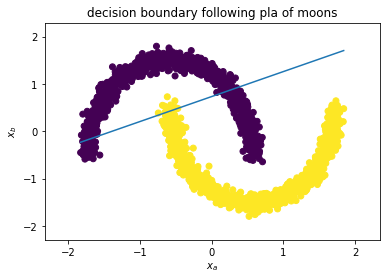

In [37]:
pla_weights, pla_iterations = pla(X, y, np.array(make_weights()), max_iterations=1000)
print(f"pla_weights, pla_iterations {pla_weights, pla_iterations}")
visualise_boundary(pla_weights, X, y, "moons")
moon_hypothesis_weights = pla_weights


In [38]:
in_sample_error = calc_error(X, y, moon_hypothesis_weights)
print(f"in sample error {in_sample_error}")

in sample error 0.1575


# Error analysis

 ## first we must find an out-sample error for our hypothesis.

 We already know that there is an equal number of each class, therefore the out-error is 0.5.
ie, there's a 50-50 chance of being correct when guessing for a random data-point, without learning what the data-set 'looks like' beforehand.

## in-sample error

and having run the pla above, we can see that the in-sample error is approx 0.1345,

now lets re-run it so we have a larger set of results to analyse

In [39]:
def pocket_pla(Num_pocket_runs):
    error_scores = []
    overall_iterations = 0
    for i in range(Num_pocket_runs):
        X, y = moons_pla_setup(plot=False)
        pla_weights, pla_iterations = pla(X, y, np.array([0.5,0.5, 0.5]), max_iterations=10)
        overall_iterations += pla_iterations
        error_in = calc_error(X, y, pla_weights)
        error_scores.append(error_in)
    error_1 = error_scores[0]
    error_rand = error_scores[rnd.randint(0,Num_pocket_runs-1)]
    error_min = min(error_scores)
    return error_1,error_rand, error_min, overall_iterations

def hoeffding_value(N, epsilon):
	return 2.0 * math.exp (-2*N*epsilon**2)

Hoeffding Inequality:


$P[|E_{in}-E_{out}|>\epsilon] \le 2e^{-2N\epsilon^2}$

In [40]:
Num_pocket_runs = 10
dist_1 = []
dist_rand=[]
dist_min=[]
lists = [dist_1, dist_rand, dist_min]
iterations_for_run = []
for e in range(Num_pocket_runs):
    error_1,error_rand, error_min, overall_iterations = pocket_pla(Num_pocket_runs)
    iterations_for_run.append(overall_iterations)
    errors = [error_1,error_rand, error_min]
    for x, lst in zip(errors, lists):
        lst.append(x)

10


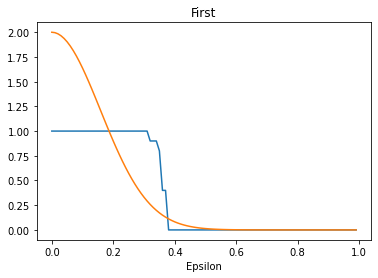

10


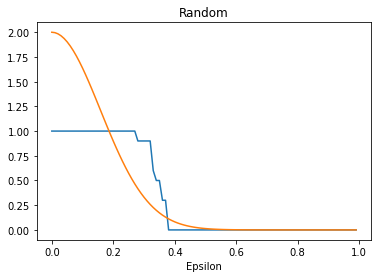

10


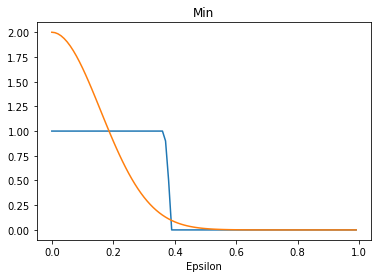

In [41]:
titles = ["First", "Random", "Min"]
M = np.sum(iterations_for_run)
for d in range(0,3):
    Errors_in = lists[d]
    prob_epsilon=[]
    epsilons = np.arange(0, 1, 0.01)
    for e in epsilons:
        prob_epsilon.append(len([1 for E_in in Errors_in if abs(E_in-0.5) > e])/len(Errors_in))

    plt.figure()
    plt.xlabel("Epsilon")
    plt.plot(epsilons, prob_epsilon, label="")
    plt.plot(epsilons, [hoeffding_value(Num_pocket_runs, e) for e in epsilons], label="hoeff")
    plt.title(titles[d])
    plt.show()

From these results, we can conclude that the pocket pla does not obey this version of the Hoeffding inequality, however, the pla does use multiple iterations per runthrough, so perhaps these iterations should also be accounted for when calculating our Hoeffding bound


Because the final hypothesis that the pla finds is dependant on improvements on many other hypotheses, our Hoeffding bound can be 'loosened', using two rules of probability

where event $B_{1}$ implies $B_{2}$ and so on.. 

g is our final hypothesis

M is the number of hypotheses considered

and $h_{i}$ is a given hypothesis

$P[B_{1} $ or $B_{2}$ or ... or $B_{M}]$ $\le$ $P[B_{1}]$  +  $P[B_{2}]$ + ... + $P[B_{M}] $

&
the Union bound rule

$P[| E_{in}(g) - E_{out}(g) | > \epsilon ] \le P[|E_{in}(h1) - E_{out}(h1)| > \epsilon$  or ... or $|E_{in}(hM) - E_{out}(hM)| > \epsilon ]$

applying these two rules, we can conclude that 

$P[|E_{in}-E_{out}|>\epsilon]$ < $2Me^{-2N\epsilon^2}$

which is known as the uniform Hoeffding bound

accounting for this we can see that the pocekt algorithm does follow the uniform Hoeffding bound for the moons dataset

The above was taken from Learning from data chapter 1

31906  hypotheses considered


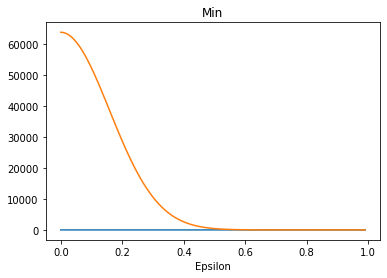

In [42]:
    print(f"{M}  hypotheses considered")
    plt.figure()
    plt.xlabel("Epsilon")
    plt.plot(epsilons, prob_epsilon, label="")
    plt.plot(epsilons, [M*hoeffding_value(Num_pocket_runs, e) for e in epsilons], label="hoeff")
    plt.title(titles[d])
    plt.show()